In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data_roles.csv")

## Inspecting the data

In [3]:
df

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
0,2017,"Yes, both",43750.00000,United Kingdom,Bachelor's degree,Employed full-time,4.0,2 to 9 employees,Computer science,2.0,1,1,NaN,NaN
1,2017,"Yes, I program as a hobby",51282.05128,Denmark,Some college/university study without earning ...,Employed part-time,10.0,100 to 499 employees,Computer science,3.0,1,0,NaN,NaN
2,2017,No,25000.00000,Israel,Some college/university study without earning ...,Employed full-time,6.0,"5,000 to 9,999 employees",Computer science,4.0,1,0,NaN,NaN
3,2017,"Yes, I program as a hobby",100000.00000,United States,Some college/university study without earning ...,Employed full-time,5.0,20 to 99 employees,Computer science,15.0,0,1,NaN,NaN
4,2017,"Yes, both",27000.00000,Ukraine,Master's degree,Employed full-time,7.0,100 to 499 employees,Computer science,5.0,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33596,2020,Yes,225000.00000,United States,Some college/university study without earning ...,Employed full-time,8.0,"1,000 to 4,999 employees",Mathematics or statistics,15.0,0,0,0.0,1.0
33597,2020,Yes,369.00000,"Venezuela, Bolivarian Republic of...",Some college/university study without earning ...,Employed full-time,2.0,"1,000 to 4,999 employees",Computer science,27.0,0,1,0.0,1.0
33598,2020,No,38484.00000,Hungary,Master's degree,"Independent contractor, freelancer, or self-em...",8.0,"Just me - I am a freelancer, sole proprietor, ...",Humanities,12.0,0,0,1.0,0.0
33599,2020,Yes,140000.00000,United States,Doctoral degree,Employed full-time,8.0,"10,000 or more employees",Another engineering discipline,12.0,1,0,1.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33601 entries, 0 to 33600
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           33601 non-null  int64  
 1   Hobbyist                                       33601 non-null  object 
 2   ConvertedComp                                  33601 non-null  float64
 3   Country                                        33601 non-null  object 
 4   EdLevel                                        33138 non-null  object 
 5   Employment                                     33561 non-null  object 
 6   JobSat                                         33526 non-null  float64
 7   OrgSize                                        31904 non-null  object 
 8   UndergradMajor                                 30515 non-null  object 
 9   YearsCodePro                                   335

In [5]:
df.describe()

,Year,ConvertedComp,JobSat,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
count,33601.000000,33601.000000,33526.000000,33518.000000,33601.000000,33601.000000,31037.000000,20246.000000
mean,2018.759680,62593.092531,6.124262,8.755713,0.321657,0.540103,0.321519,0.303566
std,0.895598,49024.452804,1.926280,7.195122,0.467119,0.498397,0.467067,0.459809
min,2017.000000,0.176186,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,24576.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,53000.000000,6.000000,6.000000,0.000000,1.000000,0.000000,0.000000
75%,2019.000000,87036.000000,8.000000,12.000000,1.000000,1.000000,1.000000,1.000000
max,2020.000000,299436.000000,10.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.describe(include="O")

,Hobbyist,Country,EdLevel,Employment,OrgSize,UndergradMajor
count,33601,33601,33138,33561,31904,30515
unique,5,180,10,3,11,15
top,Yes,United States,Bachelor's degree,Employed full-time,20 to 99 employees,Computer science
freq,25225,9098,14140,28673,6861,17015


## Inconsistent data

#### Hobbyist

In [7]:
df.Hobbyist.unique()

array(['Yes, both', 'Yes, I program as a hobby', 'No',
       'Yes, I contribute to open source projects', 'Yes'], dtype=object)

In [8]:
df["Hobbyist"].replace({"Yes, I program as a hobby": "Yes", "Yes, I contribute to open source projects":"Yes"}, inplace=True)

In [9]:
df["Hobbyist"].replace({"Yes, both":"Both"},inplace=True)

In [10]:
df.groupby("Hobbyist").count()

,Year,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
Hobbyist,,,,,,,,,,,,,
Both,783,783,783,783,783,780,782,697,781,783,783,0,0
No,6218,6218,6218,6136,6210,6205,5889,5768,6197,6218,6218,5812,4009
Yes,26600,26600,26600,26219,26568,26541,25233,24050,26540,26600,26600,25225,16237


## Missing values

In [11]:
df.isna().sum(axis=0)

Year                                                 0
Hobbyist                                             0
ConvertedComp                                        0
Country                                              0
EdLevel                                            463
Employment                                          40
JobSat                                              75
OrgSize                                           1697
UndergradMajor                                    3086
YearsCodePro                                        83
Data scientist or machine learning specialist        0
Database administrator                               0
Data or business analyst                          2564
Engineer, data                                   13355
dtype: int64

In [12]:
df["OrgSize"] = df["OrgSize"].fillna(value="Unknown")

In [13]:
df["UndergradMajor"] = df["UndergradMajor"].fillna(value="Unknown")

In [14]:
df.loc[df.UndergradMajor == "Unknown"]

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
14,2017,Both,40000.00000,Germany,Secondary school,Employed full-time,6.0,20 to 99 employees,Unknown,4.0,1,0,NaN,NaN
22,2017,Yes,20493.82716,Poland,Secondary school,Employed part-time,9.0,2 to 9 employees,Unknown,1.0,1,0,NaN,NaN
41,2017,Yes,27272.72727,Canada,Secondary school,Employed full-time,3.0,20 to 99 employees,Unknown,2.0,0,1,NaN,NaN
54,2017,Both,88000.00000,United States,Secondary school,Employed full-time,5.0,100 to 499 employees,Unknown,11.0,0,1,NaN,NaN
107,2017,Yes,47500.00000,United States,Secondary school,Employed full-time,8.0,20 to 99 employees,Unknown,2.0,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33529,2020,Yes,150000.00000,United States,Primary/elementary school,Employed full-time,4.0,10 to 19 employees,Unknown,20.0,0,0,0.0,1.0
33550,2020,Yes,23328.00000,Afghanistan,I never completed any formal education,Employed full-time,8.0,20 to 99 employees,Unknown,5.0,1,0,0.0,0.0
33578,2020,No,13620.00000,Argentina,Secondary school,Employed full-time,5.0,20 to 99 employees,Unknown,7.0,0,1,0.0,0.0
33590,2020,Yes,38375.00000,Spain,I never completed any formal education,Employed full-time,6.0,"1,000 to 4,999 employees",Unknown,7.0,0,0,0.0,1.0


In [15]:
df.loc[df["Engineer, data"].isna()]

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
0,2017,Both,43750.00000,United Kingdom,Bachelor's degree,Employed full-time,4.0,2 to 9 employees,Computer science,2.0,1,1,NaN,NaN
1,2017,Yes,51282.05128,Denmark,Some college/university study without earning ...,Employed part-time,10.0,100 to 499 employees,Computer science,3.0,1,0,NaN,NaN
2,2017,No,25000.00000,Israel,Some college/university study without earning ...,Employed full-time,6.0,"5,000 to 9,999 employees",Computer science,4.0,1,0,NaN,NaN
3,2017,Yes,100000.00000,United States,Some college/university study without earning ...,Employed full-time,5.0,20 to 99 employees,Computer science,15.0,0,1,NaN,NaN
4,2017,Both,27000.00000,Ukraine,Master's degree,Employed full-time,7.0,100 to 499 employees,Computer science,5.0,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13350,2018,Yes,37572.00000,India,Master's degree,NaN,NaN,Unknown,Information systems,5.0,0,1,0.0,NaN
13351,2018,Yes,14688.00000,Slovenia,Master's degree,NaN,NaN,Unknown,Computer science,2.0,0,1,0.0,NaN
13352,2018,Yes,120000.00000,United States,Primary/elementary school,NaN,NaN,Unknown,Unknown,5.0,0,1,0.0,NaN
13353,2018,Yes,7512.00000,India,Bachelor's degree,NaN,NaN,Unknown,Information systems,2.0,0,1,0.0,NaN


## Duplicates

In [16]:
len(df[df.duplicated(keep="first")])

45

In [17]:
df[df.duplicated(keep="first")]

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
2035,2017,Yes,26881.72043,France,Bachelor's degree,Employed full-time,2.0,2 to 9 employees,Computer programming or Web development,2.0,0,1,NaN,NaN
2191,2017,Both,70000.00000,United States,Bachelor's degree,Employed full-time,7.0,20 to 99 employees,Mathematics or statistics,6.0,0,1,NaN,NaN
3628,2018,Yes,80000.00000,United States,Master's degree,Employed full-time,7.0,"10,000 or more employees",Mathematics or statistics,5.0,1,0,1.0,NaN
4862,2018,Yes,62507.00000,United Kingdom,Bachelor's degree,Employed full-time,7.0,2 to 9 employees,Computer science,5.0,0,1,0.0,NaN
6467,2018,Yes,200000.00000,United States,Bachelor's degree,Employed full-time,7.0,100 to 499 employees,Computer science,17.0,0,1,0.0,NaN
6486,2018,Yes,18720.00000,Brazil,Bachelor's degree,Employed full-time,7.0,10 to 19 employees,Computer science,5.0,0,1,0.0,NaN
6834,2018,Yes,34726.00000,United Kingdom,Some college/university study without earning ...,Employed full-time,7.0,10 to 19 employees,Computer science,5.0,0,1,0.0,NaN
7099,2018,Yes,3756.00000,India,Bachelor's degree,Employed full-time,4.0,500 to 999 employees,Computer science,2.0,0,0,1.0,NaN
7225,2018,Yes,75000.00000,United States,Bachelor's degree,Employed full-time,7.0,20 to 99 employees,Computer science,5.0,0,1,0.0,NaN
7526,2018,Yes,79552.00000,Germany,Secondary school,Employed full-time,9.0,100 to 499 employees,Unknown,11.0,0,1,0.0,NaN


## Outliers

In [18]:
df.describe()

,Year,ConvertedComp,JobSat,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
count,33601.000000,33601.000000,33526.000000,33518.000000,33601.000000,33601.000000,31037.000000,20246.000000
mean,2018.759680,62593.092531,6.124262,8.755713,0.321657,0.540103,0.321519,0.303566
std,0.895598,49024.452804,1.926280,7.195122,0.467119,0.498397,0.467067,0.459809
min,2017.000000,0.176186,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,24576.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,53000.000000,6.000000,6.000000,0.000000,1.000000,0.000000,0.000000
75%,2019.000000,87036.000000,8.000000,12.000000,1.000000,1.000000,1.000000,1.000000
max,2020.000000,299436.000000,10.000000,30.000000,1.000000,1.000000,1.000000,1.000000


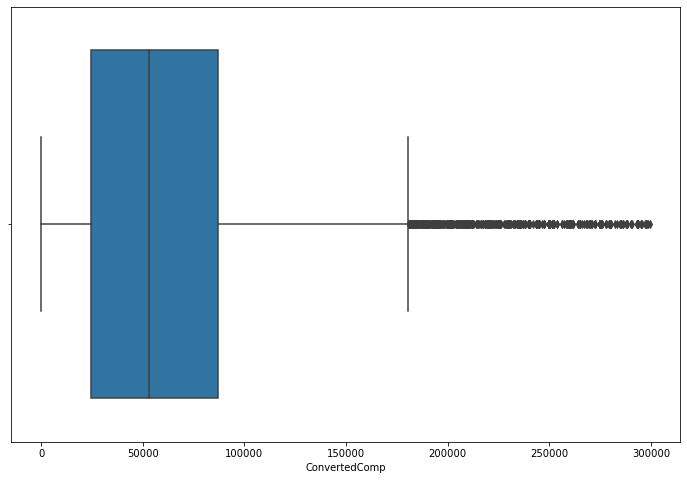

In [19]:
# COMPENSATION
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="ConvertedComp")
plt.show()

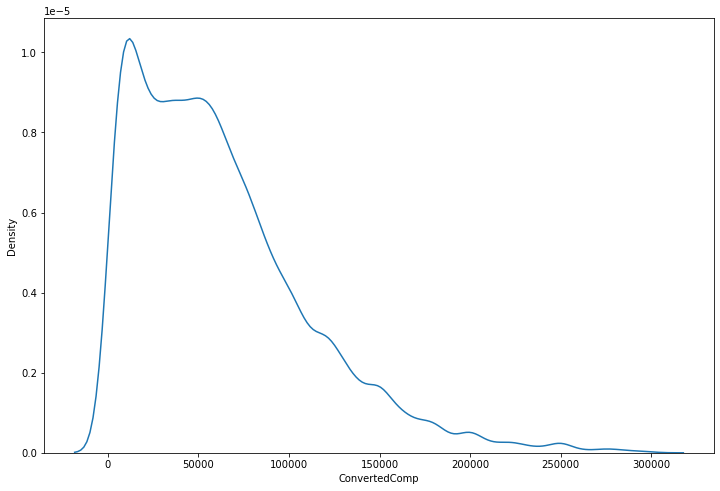

In [20]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=df, x="ConvertedComp")
plt.show()

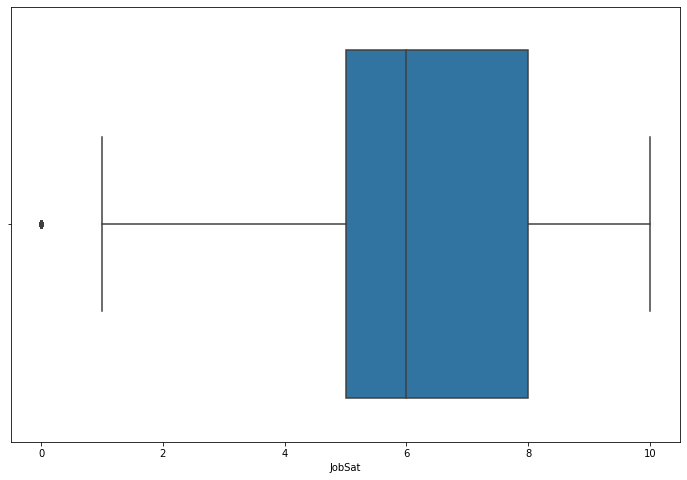

In [21]:
# Job Satisfaction
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="JobSat")
plt.show()

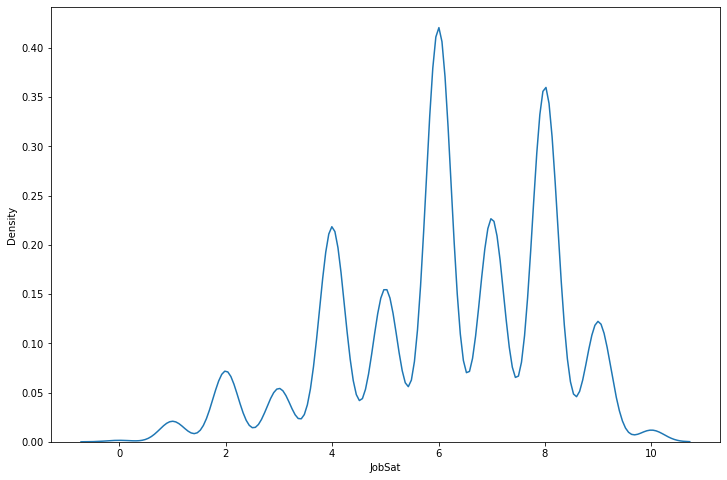

In [22]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=df, x="JobSat")
plt.show()

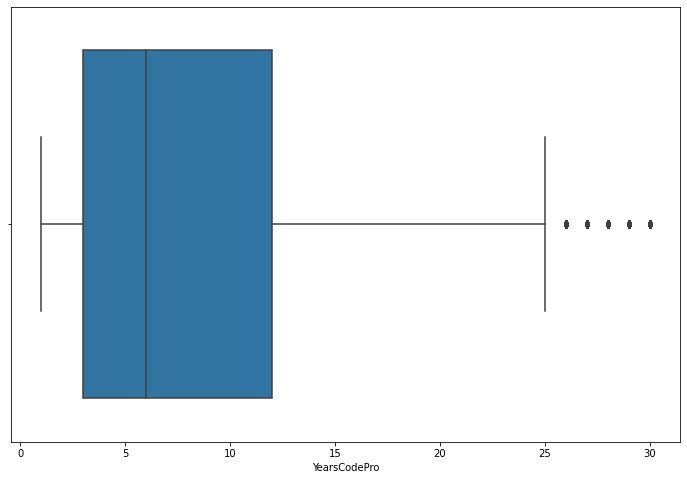

In [23]:
# YearsCodePro
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="YearsCodePro")
plt.show()

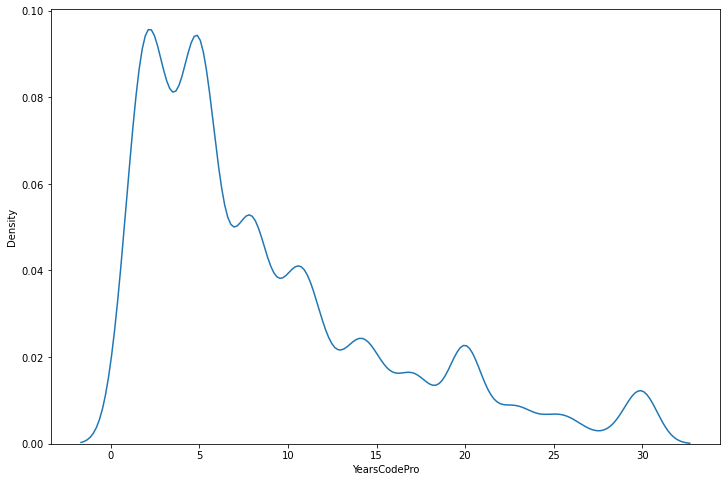

In [24]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=df, x="YearsCodePro")
plt.show()

## Functions

#### Organization size

In [25]:
# Grouping org-size
df.OrgSize.unique()

array(['2 to 9 employees', '100 to 499 employees',
       '5,000 to 9,999 employees', '20 to 99 employees',
       '1,000 to 4,999 employees', '10 to 19 employees',
       '500 to 999 employees', '10,000 or more employees', "I don't know",
       'Unknown', 'I prefer not to answer',
       'Just me - I am a freelancer, sole proprietor, etc.'], dtype=object)

In [29]:
df["comp_size"] = df.OrgSize.map(mapper)

In [27]:
mapper = {'2 to 9 employees':"Micro", '100 to 499 employees':"Medium",
       '5,000 to 9,999 employees':"Large", '20 to 99 employees':"Small",
       '1,000 to 4,999 employees':"Large", '10 to 19 employees':"Small",
       '500 to 999 employees':"Medium", '10,000 or more employees':"Very Large", "I don't know":"Other",
       'Unknown':"Other", 'I prefer not to answer':"Other",
       'Just me - I am a freelancer, sole proprietor, etc.': "One man"}

In [28]:
mapper

{'2 to 9 employees': 'Micro',
 '100 to 499 employees': 'Medium',
 '5,000 to 9,999 employees': 'Large',
 '20 to 99 employees': 'Small',
 '1,000 to 4,999 employees': 'Large',
 '10 to 19 employees': 'Small',
 '500 to 999 employees': 'Medium',
 '10,000 or more employees': 'Very Large',
 "I don't know": 'Other',
 'Unknown': 'Other',
 'I prefer not to answer': 'Other',
 'Just me - I am a freelancer, sole proprietor, etc.': 'One man'}

## Setting the design

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams

In [31]:
path = "/Users/macintoshhd/Downloads/Oswald"

In [32]:
import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(path):
    print(font)
    font_manager.fontManager.addfont(font)

/Users/macintoshhd/Downloads/Oswald/static/Oswald-ExtraLight.ttf
/Users/macintoshhd/Downloads/Oswald/static/Oswald-Light.ttf
/Users/macintoshhd/Downloads/Oswald/static/Oswald-Medium.ttf
/Users/macintoshhd/Downloads/Oswald/static/Oswald-Bold.ttf
/Users/macintoshhd/Downloads/Oswald/static/Oswald-Regular.ttf
/Users/macintoshhd/Downloads/Oswald/static/Oswald-SemiBold.ttf
/Users/macintoshhd/Downloads/Oswald/Oswald-VariableFont_wght.ttf


In [33]:
rcParams["font.family"] = "Oswald"
rcParams["font.family"]

['Oswald']

In [34]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 
'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 
'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 
'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn',
'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy',
'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 
'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu',
'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 
'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 
'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 
'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat',
'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r',
'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 
'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 
'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma',
'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring',
'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 
'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted',
'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

('twilight_shifted_r',
 'viridis',
 'viridis_r',
 'vlag',
 'vlag_r',
 'winter',
 'winter_r')

In [35]:
sns.set_palette("Set2")

In [36]:
sns.color_palette()

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

## Analysis

In [37]:
# What background are most satisfied with their current job? Difference per country? Per company size?
# Highest salary? Difference per country? Per company size?

In [38]:
# Taking a closer look at Germany, Sweden, US, UK and Switzerland

In [39]:
# DATAFRAME FOR SWEDEN, US, GERMANY, SWITZERLAND, UK
countries = df.loc[df.Country.isin(["Sweden", "United States", "Germany","United Kingdom","Switzerland"])]

In [40]:
# DATAFRAM WITHOUT US
europe = df.loc[df.Country.isin(["Sweden", "Germany","United Kingdom","Switzerland"])]

### How satisfied are people with their jobs? What is job satisfaction dependent on?

In [41]:
corr = df.corr()
matrix = np.triu(corr)

<AxesSubplot:>

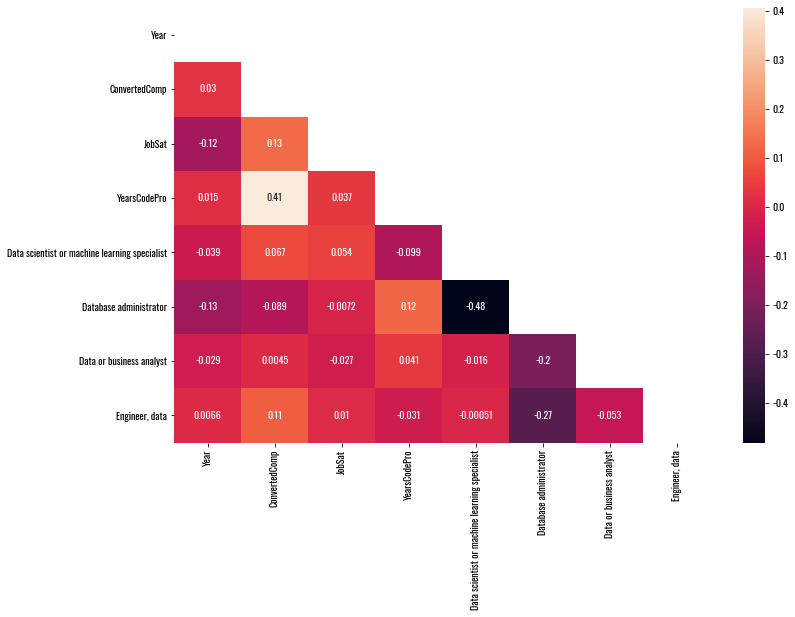

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, mask=matrix, annot=True)

In [43]:
df.groupby("JobSat").mean()

,Year,ConvertedComp,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
JobSat,,,,,,,
0.0,2017.000000,56146.058750,9.766667,0.433333,0.833333,NaN,NaN
1.0,2017.919048,53259.083260,9.300000,0.304762,0.650000,0.344560,NaN
2.0,2019.323204,58849.979350,9.124047,0.319061,0.498619,0.337877,0.289813
3.0,2017.902930,57422.704293,8.737179,0.285714,0.646520,0.368154,NaN
4.0,2019.000909,55621.147209,8.460643,0.273471,0.536486,0.344908,0.297634
5.0,2018.927796,51380.820847,8.076676,0.298722,0.549840,0.318386,0.299468
6.0,2019.039429,59031.334214,8.293428,0.309409,0.508913,0.314684,0.307566
7.0,2017.892998,62112.469831,8.855548,0.335011,0.609847,0.334967,NaN
8.0,2019.210048,74559.773183,9.240381,0.351411,0.492636,0.294847,0.306945


In [44]:
# Top 10 countries where people on average are most satisfied with their jobs
df.groupby("Country").JobSat.mean().sort_values(ascending=False).head(10)

Country
Virgin Islands (USA)      10.0
Moldavia                  10.0
New Caledonia (French)     9.0
Tajikistan                 9.0
Puerto Rico                9.0
Slovak Republic            8.5
Bermuda                    8.0
Bahamas                    8.0
Macedonia                  8.0
Isle of Man                8.0
Name: JobSat, dtype: float64

In [45]:
# Top 10 countries where people on average are the least satisfied with their jobs
df.groupby("Country").JobSat.mean().sort_values().head(10)

Country
I prefer not to say                 0.0
Lesotho                             1.0
Djibouti                            2.0
Tanzania                            3.0
Malawi                              3.5
Chad                                4.0
Burkina Faso                        4.0
Hong Kong                           4.0
Yemen                               4.0
Saint Vincent and the Grenadines    4.0
Name: JobSat, dtype: float64

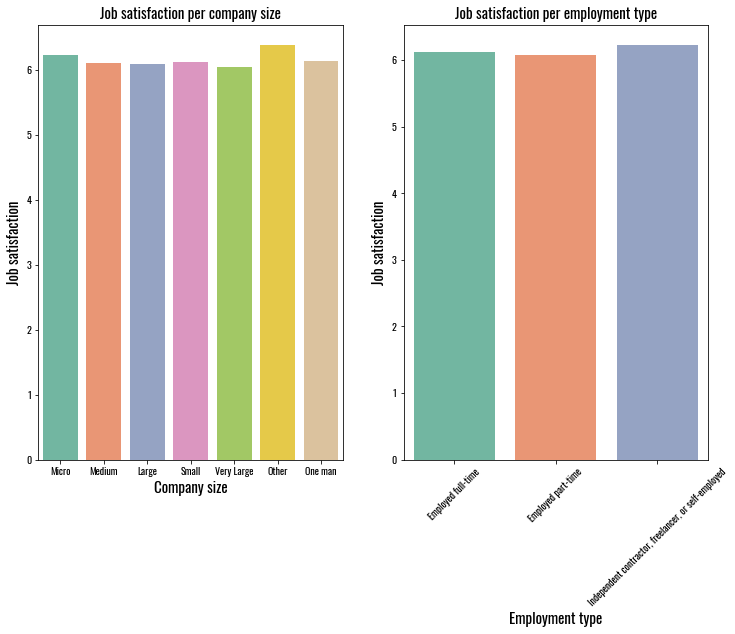

In [46]:
fig, ax = plt.subplots(1,2, figsize=(12,8))

sns.barplot(data=df, x="comp_size", y="JobSat",ci=False, ax=ax[0])
ax[0].set_title("Job satisfaction per company size", fontsize=15)
ax[0].set_xlabel("Company size",fontsize=15)
ax[0].set_ylabel("Job satisfaction",fontsize=15)

sns.barplot(data=df, x="Employment", y="JobSat", ci=False, ax=ax[1])
ax[1].set_title("Job satisfaction per employment type", fontsize=15)
ax[1].set_xlabel("Employment type",fontsize=15)
ax[1].set_ylabel("Job satisfaction",fontsize=15)
ax[1].tick_params(axis='x', rotation=45)

plt.show()

### Lowest job satisfaction

In [47]:
df_low_sat = df.loc[df.JobSat < 2]
df_low_sat

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data",comp_size
10,2017,Both,50000.0000,United States,Some college/university study without earning ...,Employed full-time,1.0,10 to 19 employees,Another engineering discipline,3.0,0,1,NaN,NaN,Small
40,2017,Yes,85000.0000,United States,Bachelor's degree,Employed full-time,1.0,"10,000 or more employees",Computer science,6.0,1,0,NaN,NaN,Very Large
43,2017,No,12365.5914,Portugal,Bachelor's degree,Employed full-time,1.0,20 to 99 employees,Computer science,3.0,0,1,NaN,NaN,Small
80,2017,Both,42000.0000,United States,Some college/university study without earning ...,Employed full-time,1.0,"5,000 to 9,999 employees",Computer programming or Web development,14.0,0,1,NaN,NaN,Large
136,2017,Both,110000.0000,I prefer not to say,Master's degree,Employed full-time,0.0,20 to 99 employees,Computer engineering or electrical/electronics...,3.0,1,1,NaN,NaN,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13226,2018,No,6000.0000,Guatemala,Bachelor's degree,"Independent contractor, freelancer, or self-em...",1.0,Unknown,Computer science,26.0,0,1,1.0,NaN,Other
13272,2018,Yes,89016.0000,Turkey,Bachelor's degree,"Independent contractor, freelancer, or self-em...",1.0,Unknown,Another engineering discipline,14.0,0,1,0.0,NaN,Other
13277,2018,No,125000.0000,United States,Associate degree,"Independent contractor, freelancer, or self-em...",1.0,Unknown,Computer science,30.0,0,1,0.0,NaN,Other
13304,2018,No,12000.0000,Colombia,Bachelor's degree,"Independent contractor, freelancer, or self-em...",1.0,Unknown,Computer science,8.0,0,1,0.0,NaN,Other


In [48]:
df_low_sat.corr()

,Year,ConvertedComp,JobSat,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
Year,1.000000,0.033002,0.656356,0.064698,-0.054134,-0.102477,NaN,NaN
ConvertedComp,0.033002,1.000000,-0.015917,0.513088,0.117328,-0.121353,0.038156,NaN
JobSat,0.656356,-0.015917,1.000000,-0.016397,-0.069142,-0.096693,NaN,NaN
YearsCodePro,0.064698,0.513088,-0.016397,1.000000,-0.107763,0.004189,0.083755,NaN
Data scientist or machine learning specialist,-0.054134,0.117328,-0.069142,-0.107763,1.000000,-0.560912,0.008143,NaN
Database administrator,-0.102477,-0.121353,-0.096693,0.004189,-0.560912,1.000000,-0.346365,NaN
Data or business analyst,NaN,0.038156,NaN,0.083755,0.008143,-0.346365,1.000000,NaN
"Engineer, data",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_low_sat.describe()

,Year,ConvertedComp,JobSat,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,386.000000,0.0
mean,2017.857778,53451.548293,0.933333,9.331111,0.313333,0.662222,0.344560,NaN
std,0.349667,45294.544034,0.249721,7.107144,0.464365,0.473479,0.475841,NaN
min,2017.000000,1.515152,0.000000,1.000000,0.000000,0.000000,0.000000,NaN
25%,2018.000000,15213.000000,1.000000,5.000000,0.000000,0.000000,0.000000,NaN
50%,2018.000000,46994.500000,1.000000,8.000000,0.000000,1.000000,0.000000,NaN
75%,2018.000000,75006.000000,1.000000,14.000000,1.000000,1.000000,1.000000,NaN
max,2018.000000,280000.000000,1.000000,30.000000,1.000000,1.000000,1.000000,NaN


### Lowest job satisfaction (UK, US, Sweden, Switzerland, Germany)

In [50]:
countries_low_sat = countries.loc[df.JobSat < 2]
countries_low_sat

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data",comp_size
10,2017,Both,50000.0,United States,Some college/university study without earning ...,Employed full-time,1.0,10 to 19 employees,Another engineering discipline,3.0,0,1,NaN,NaN,Small
40,2017,Yes,85000.0,United States,Bachelor's degree,Employed full-time,1.0,"10,000 or more employees",Computer science,6.0,1,0,NaN,NaN,Very Large
80,2017,Both,42000.0,United States,Some college/university study without earning ...,Employed full-time,1.0,"5,000 to 9,999 employees",Computer programming or Web development,14.0,0,1,NaN,NaN,Large
345,2017,Yes,50000.0,United States,Some college/university study without earning ...,Employed full-time,1.0,100 to 499 employees,Computer programming or Web development,2.0,1,0,NaN,NaN,Medium
369,2017,Yes,106000.0,United States,Bachelor's degree,Employed full-time,0.0,100 to 499 employees,Information systems,20.0,0,1,NaN,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13105,2018,Yes,72000.0,United States,Some college/university study without earning ...,"Independent contractor, freelancer, or self-em...",1.0,Unknown,Computer science,2.0,0,1,0.0,NaN,Other
13155,2018,Yes,14688.0,Germany,Some college/university study without earning ...,"Independent contractor, freelancer, or self-em...",1.0,Unknown,Mathematics or statistics,14.0,0,1,0.0,NaN,Other
13188,2018,Yes,90000.0,United States,Some college/university study without earning ...,"Independent contractor, freelancer, or self-em...",1.0,Unknown,Computer science,11.0,0,1,0.0,NaN,Other
13192,2018,Yes,12480.0,Germany,Secondary school,"Independent contractor, freelancer, or self-em...",1.0,Unknown,Unknown,5.0,0,1,0.0,NaN,Other


In [51]:
countries_low_sat.describe()

,Year,ConvertedComp,JobSat,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,153.000000,0.0
mean,2017.831522,81268.051393,0.929348,11.336957,0.304348,0.679348,0.333333,NaN
std,0.375312,45892.642850,0.256942,7.756932,0.461386,0.468001,0.472953,NaN
min,2017.000000,139.000000,0.000000,2.000000,0.000000,0.000000,0.000000,NaN
25%,2018.000000,51045.500000,1.000000,5.000000,0.000000,0.000000,0.000000,NaN
50%,2018.000000,72716.500000,1.000000,8.000000,0.000000,1.000000,0.000000,NaN
75%,2018.000000,107750.000000,1.000000,17.000000,1.000000,1.000000,1.000000,NaN
max,2018.000000,280000.000000,1.000000,30.000000,1.000000,1.000000,1.000000,NaN


In [52]:
# Calculating percentage of low job satisfaction per country 

In [53]:
countries.Country.value_counts().sort_index().index.equals(countries_low_sat.Country.value_counts().sort_index().index)

True

In [54]:
countries_low_sat.Country.value_counts().sort_index().div(countries.Country.value_counts().sort_index()).sort_values(ascending=False)

United Kingdom    0.013831
United States     0.012860
Germany           0.011652
Switzerland       0.006494
Sweden            0.005671
Name: Country, dtype: float64

### Highest job satisfaction

In [55]:
df_high_sat = df.loc[df.JobSat > 8]
df_high_sat
# AVERAGE PERSON 

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data",comp_size
1,2017,Yes,51282.051280,Denmark,Some college/university study without earning ...,Employed part-time,10.0,100 to 499 employees,Computer science,3.0,1,0,NaN,NaN,Medium
5,2017,Yes,120000.000000,United States,Bachelor's degree,Employed full-time,10.0,20 to 99 employees,Computer science,5.0,0,1,NaN,NaN,Small
8,2017,Yes,1481.481481,Poland,Bachelor's degree,Employed full-time,10.0,2 to 9 employees,Humanities,1.0,0,1,NaN,NaN,Micro
9,2017,Both,50000.000000,United States,Some college/university study without earning ...,Employed full-time,10.0,2 to 9 employees,Computer science,16.0,0,1,NaN,NaN,Micro
12,2017,No,81000.000000,United States,Master's degree,Employed full-time,10.0,"1,000 to 4,999 employees",Another engineering discipline,7.0,1,0,NaN,NaN,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13289,2018,Yes,8676.000000,Pakistan,Bachelor's degree,"Independent contractor, freelancer, or self-em...",9.0,Unknown,Computer science,5.0,0,1,0.0,NaN,Other
13296,2018,Yes,83342.000000,United Kingdom,Bachelor's degree,"Independent contractor, freelancer, or self-em...",9.0,Unknown,Computer science,23.0,0,1,0.0,NaN,Other
13306,2018,Yes,31788.000000,Turkey,Bachelor's degree,"Independent contractor, freelancer, or self-em...",9.0,Unknown,Another engineering discipline,8.0,0,1,0.0,NaN,Other
13309,2018,Yes,175000.000000,United States,Master's degree,"Independent contractor, freelancer, or self-em...",9.0,Unknown,Business,20.0,0,1,1.0,NaN,Other


In [56]:
df_high_sat.corr()

,Year,ConvertedComp,JobSat,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
Year,1.000000,0.088498,-0.552893,0.069328,-0.101608,-0.079227,NaN,NaN
ConvertedComp,0.088498,1.000000,-0.028914,0.460782,0.100957,-0.103337,0.051189,NaN
JobSat,-0.552893,-0.028914,1.000000,-0.040442,0.042092,0.056935,NaN,NaN
YearsCodePro,0.069328,0.460782,-0.040442,1.000000,-0.110517,0.102315,0.080731,NaN
Data scientist or machine learning specialist,-0.101608,0.100957,0.042092,-0.110517,1.000000,-0.618215,-0.053073,NaN
Database administrator,-0.079227,-0.103337,0.056935,0.102315,-0.618215,1.000000,-0.275950,NaN
Data or business analyst,NaN,0.051189,NaN,0.080731,-0.053073,-0.275950,1.000000,NaN
"Engineer, data",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df_high_sat.describe()

,Year,ConvertedComp,JobSat,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
count,2701.000000,2701.000000,2701.000000,2695.000000,2701.000000,2701.000000,2050.000000,0.0
mean,2017.758978,73003.060138,9.088486,9.774026,0.378008,0.600889,0.327805,NaN
std,0.427783,48158.088233,0.284053,7.380309,0.484979,0.489806,0.469528,NaN
min,2017.000000,0.176186,9.000000,1.000000,0.000000,0.000000,0.000000,NaN
25%,2018.000000,37428.000000,9.000000,5.000000,0.000000,0.000000,0.000000,NaN
50%,2018.000000,65000.000000,9.000000,8.000000,0.000000,1.000000,0.000000,NaN
75%,2018.000000,100000.000000,9.000000,14.000000,1.000000,1.000000,1.000000,NaN
max,2018.000000,277808.000000,10.000000,30.000000,1.000000,1.000000,1.000000,NaN


In [58]:
# Calculate percentage of each country

In [59]:
df.Country.value_counts().sort_index().index.equals(df_high_sat.Country.value_counts().sort_index().index)

False

In [60]:
df_high_sat.Country.value_counts().sort_index().div(df.Country.value_counts().sort_index()).sort_values(ascending=False)

Virgin Islands (USA)      1.0
Tajikistan                1.0
New Caledonia (French)    1.0
Moldavia                  1.0
Slovak Republic           0.5
                         ... 
Uganda                    NaN
Vietnam                   NaN
Yemen                     NaN
Zaire                     NaN
Zambia                    NaN
Name: Country, Length: 180, dtype: float64

### Highest job satisfaction (US, UK, Sweden, Switzerland, Germany)

In [61]:
countries_high_sat = countries.loc[df.JobSat > 8]
countries_high_sat

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data",comp_size
5,2017,Yes,120000.0,United States,Bachelor's degree,Employed full-time,10.0,20 to 99 employees,Computer science,5.0,0,1,NaN,NaN,Small
9,2017,Both,50000.0,United States,Some college/university study without earning ...,Employed full-time,10.0,2 to 9 employees,Computer science,16.0,0,1,NaN,NaN,Micro
12,2017,No,81000.0,United States,Master's degree,Employed full-time,10.0,"1,000 to 4,999 employees",Another engineering discipline,7.0,1,0,NaN,NaN,Large
13,2017,Yes,120000.0,United States,Bachelor's degree,Employed full-time,10.0,20 to 99 employees,Computer science,20.0,1,0,NaN,NaN,Small
24,2017,Both,84000.0,Switzerland,Master's degree,Employed full-time,10.0,500 to 999 employees,Computer engineering or electrical/electronics...,5.0,1,0,NaN,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13267,2018,No,109992.0,United States,Master's degree,"Independent contractor, freelancer, or self-em...",9.0,Unknown,Mathematics or statistics,14.0,0,1,0.0,NaN,Other
13271,2018,Yes,173650.0,United Kingdom,Some college/university study without earning ...,"Independent contractor, freelancer, or self-em...",9.0,Unknown,Computer science,11.0,0,1,0.0,NaN,Other
13285,2018,Yes,7500.0,United States,Some college/university study without earning ...,Employed part-time,9.0,Unknown,Mathematics or statistics,2.0,1,0,0.0,NaN,Other
13296,2018,Yes,83342.0,United Kingdom,Bachelor's degree,"Independent contractor, freelancer, or self-em...",9.0,Unknown,Computer science,23.0,0,1,0.0,NaN,Other


In [62]:
countries_high_sat.describe()

,Year,ConvertedComp,JobSat,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
count,1506.000000,1506.000000,1506.000000,1502.000000,1506.000000,1506.000000,1135.000000,0.0
mean,2017.753652,90463.933612,9.090305,10.432756,0.394422,0.588313,0.314537,NaN
std,0.431027,46465.523195,0.286714,7.648625,0.488889,0.492302,0.464536,NaN
min,2017.000000,85.000000,9.000000,1.000000,0.000000,0.000000,0.000000,NaN
25%,2018.000000,58000.000000,9.000000,5.000000,0.000000,0.000000,0.000000,NaN
50%,2018.000000,85000.000000,9.000000,8.000000,0.000000,1.000000,0.000000,NaN
75%,2018.000000,120000.000000,9.000000,16.000000,1.000000,1.000000,1.000000,NaN
max,2018.000000,277808.000000,10.000000,30.000000,1.000000,1.000000,1.000000,NaN


In [63]:
countries.Country.value_counts().sort_index().index.equals(countries_high_sat.Country.value_counts().sort_index().index)

True

In [64]:
countries_high_sat.Country.value_counts().sort_index().div(countries.Country.value_counts().sort_index()).sort_values(ascending=False)

United States     0.106287
United Kingdom    0.104778
Switzerland       0.088745
Germany           0.084894
Sweden            0.083176
Name: Country, dtype: float64

## Examining differences in salary depending on education, country etc.

In [65]:
df

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data",comp_size
0,2017,Both,43750.00000,United Kingdom,Bachelor's degree,Employed full-time,4.0,2 to 9 employees,Computer science,2.0,1,1,NaN,NaN,Micro
1,2017,Yes,51282.05128,Denmark,Some college/university study without earning ...,Employed part-time,10.0,100 to 499 employees,Computer science,3.0,1,0,NaN,NaN,Medium
2,2017,No,25000.00000,Israel,Some college/university study without earning ...,Employed full-time,6.0,"5,000 to 9,999 employees",Computer science,4.0,1,0,NaN,NaN,Large
3,2017,Yes,100000.00000,United States,Some college/university study without earning ...,Employed full-time,5.0,20 to 99 employees,Computer science,15.0,0,1,NaN,NaN,Small
4,2017,Both,27000.00000,Ukraine,Master's degree,Employed full-time,7.0,100 to 499 employees,Computer science,5.0,0,1,NaN,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33596,2020,Yes,225000.00000,United States,Some college/university study without earning ...,Employed full-time,8.0,"1,000 to 4,999 employees",Mathematics or statistics,15.0,0,0,0.0,1.0,Large
33597,2020,Yes,369.00000,"Venezuela, Bolivarian Republic of...",Some college/university study without earning ...,Employed full-time,2.0,"1,000 to 4,999 employees",Computer science,27.0,0,1,0.0,1.0,Large
33598,2020,No,38484.00000,Hungary,Master's degree,"Independent contractor, freelancer, or self-em...",8.0,"Just me - I am a freelancer, sole proprietor, ...",Humanities,12.0,0,0,1.0,0.0,One man
33599,2020,Yes,140000.00000,United States,Doctoral degree,Employed full-time,8.0,"10,000 or more employees",Another engineering discipline,12.0,1,0,1.0,1.0,Very Large


In [66]:
df.groupby("EdLevel").mean()

,Year,ConvertedComp,JobSat,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
EdLevel,,,,,,,,
Associate degree,2018.867589,62505.046443,6.041502,9.799209,0.096838,0.750000,0.311265,0.218898
Bachelor's degree,2018.757284,60872.451962,6.076498,8.037357,0.261315,0.578996,0.337500,0.307412
Doctoral degree,2018.825550,88569.098613,6.472835,10.656048,0.796565,0.143854,0.262041,0.259949
I never completed any formal education,2018.750000,57548.602253,5.985612,10.417266,0.257143,0.721429,0.268293,0.287356
I prefer not to answer,2017.000000,22888.352446,6.400000,6.700000,0.200000,1.000000,NaN,NaN
Master's degree,2018.818182,65818.312305,6.147732,8.664370,0.473614,0.369290,0.333017,0.370688
Primary/elementary school,2018.651741,51607.220910,5.939086,9.210000,0.203980,0.761194,0.284946,0.310680
Professional degree,2018.840319,42121.896861,5.822355,9.672655,0.217565,0.650699,0.313684,0.274143
Secondary school,2018.595982,49784.973022,6.221973,8.600784,0.141741,0.781808,0.253283,0.205852


### Salaries for selected countries

In [67]:
# DATAFRAME FOR SWEDEN, US, GERMANY, SWITZERLAND, UK
countries = df.loc[df.Country.isin(["Sweden", "United States", "Germany","United Kingdom","Switzerland"])]

In [68]:
countries

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data",comp_size
0,2017,Both,43750.0,United Kingdom,Bachelor's degree,Employed full-time,4.0,2 to 9 employees,Computer science,2.0,1,1,NaN,NaN,Micro
3,2017,Yes,100000.0,United States,Some college/university study without earning ...,Employed full-time,5.0,20 to 99 employees,Computer science,15.0,0,1,NaN,NaN,Small
5,2017,Yes,120000.0,United States,Bachelor's degree,Employed full-time,10.0,20 to 99 employees,Computer science,5.0,0,1,NaN,NaN,Small
9,2017,Both,50000.0,United States,Some college/university study without earning ...,Employed full-time,10.0,2 to 9 employees,Computer science,16.0,0,1,NaN,NaN,Micro
10,2017,Both,50000.0,United States,Some college/university study without earning ...,Employed full-time,1.0,10 to 19 employees,Another engineering discipline,3.0,0,1,NaN,NaN,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33591,2020,Yes,100000.0,United States,Bachelor's degree,Employed full-time,6.0,"10,000 or more employees",Unknown,5.0,1,1,1.0,1.0,Very Large
33592,2020,Yes,200000.0,United States,Master's degree,Employed full-time,8.0,20 to 99 employees,Another engineering discipline,30.0,1,0,1.0,0.0,Small
33596,2020,Yes,225000.0,United States,Some college/university study without earning ...,Employed full-time,8.0,"1,000 to 4,999 employees",Mathematics or statistics,15.0,0,0,0.0,1.0,Large
33599,2020,Yes,140000.0,United States,Doctoral degree,Employed full-time,8.0,"10,000 or more employees",Another engineering discipline,12.0,1,0,1.0,1.0,Very Large


In [69]:
countries.pivot_table(index="EdLevel" ,columns="Country",values="ConvertedComp",aggfunc="mean")

Country,Germany,Sweden,Switzerland,United Kingdom,United States
EdLevel,,,,,
Associate degree,49395.537313,57836.000000,88202.400000,55433.325581,85897.874693
Bachelor's degree,57692.190519,58119.664496,91521.211538,64978.580663,102011.872165
Doctoral degree,79428.946411,58385.660111,117460.147541,80142.238318,131294.308511
I never completed any formal education,52836.043010,25228.800000,120726.500000,142185.000000,101056.878788
I prefer not to answer,16433.691754,NaN,NaN,NaN,NaN
Master's degree,67667.343065,61995.735657,100692.350067,73319.055338,113708.350026
Primary/elementary school,37395.333333,71551.160637,56018.333333,47003.125000,91865.675000
Professional degree,64397.279968,49371.672916,82857.900000,157454.666667,103253.333333
Secondary school,45364.396005,54368.181319,62494.750000,64885.162791,90249.918819


In [70]:
piv = countries.pivot_table(index="EdLevel" ,columns="Country",values="ConvertedComp",aggfunc="mean")

In [71]:
piv.index

Index(['Associate degree', 'Bachelor's degree', 'Doctoral degree',
       'I never completed any formal education', 'I prefer not to answer',
       'Master's degree', 'Primary/elementary school', 'Professional degree',
       'Secondary school',
       'Some college/university study without earning a bachelor's degree'],
      dtype='object', name='EdLevel')

In [72]:
piv = piv.loc[piv.index != 'I prefer not to answer']

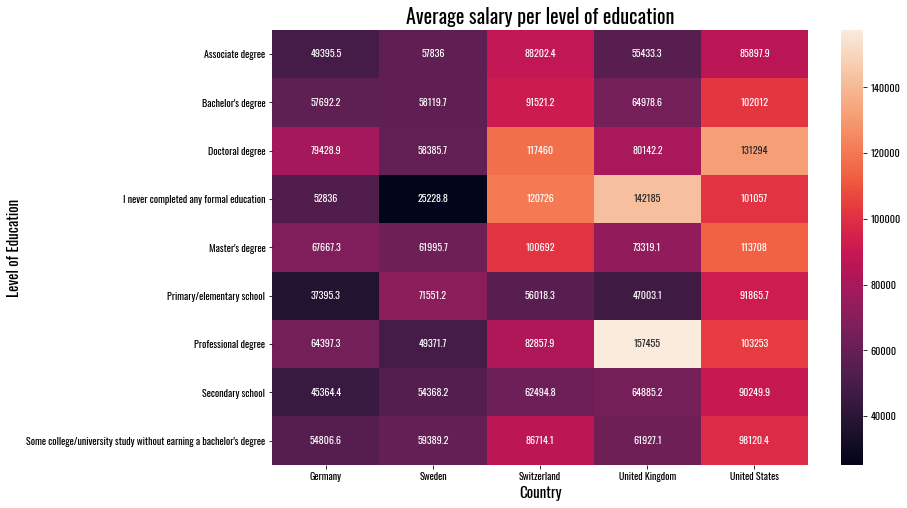

In [73]:
plt.figure(figsize=(12,8))
sns.heatmap(piv, annot=True, fmt="g")

plt.title("Average salary per level of education", fontsize=20)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Level of Education", fontsize=15)

plt.show()

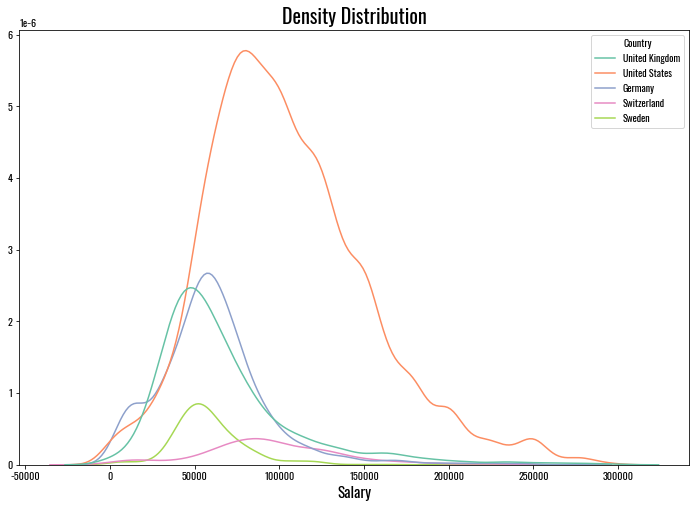

In [98]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=countries, x="ConvertedComp", hue="Country")

plt.title("Density Distribution", fontsize=20)
plt.xlabel("Salary", fontsize=15)
plt.ylabel("")

plt.show()

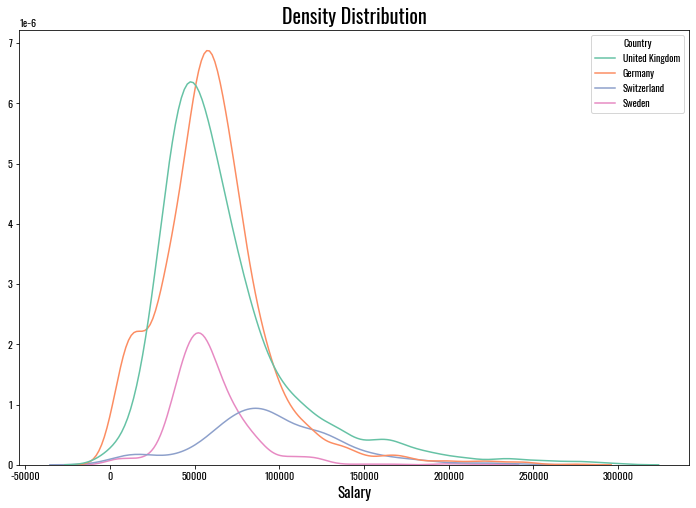

In [97]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=europe, x="ConvertedComp", hue="Country")

plt.title("Density Distribution", fontsize=20)
plt.xlabel("Salary", fontsize=15)
plt.ylabel("")

plt.show()

In [76]:
piv2 = countries.pivot_table(index="UndergradMajor" ,columns="Country",values="ConvertedComp",aggfunc="mean")

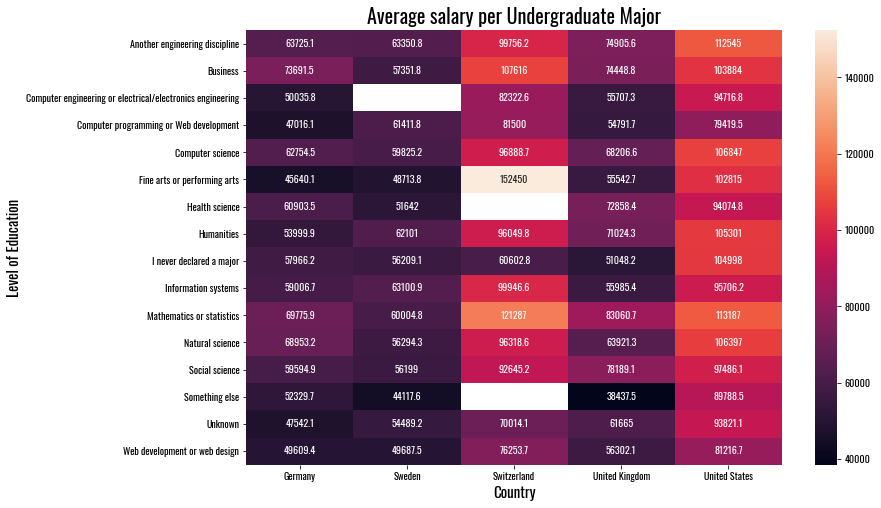

In [77]:
plt.figure(figsize=(12,8))
sns.heatmap(piv2, annot=True, fmt="g")

plt.title("Average salary per Undergraduate Major", fontsize=20)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Level of Education", fontsize=15)

plt.show()

### Job satisfaction for selected countries

In [78]:
piv3 = countries.pivot_table(index="EdLevel" ,columns="Country",values="JobSat",aggfunc="mean")

In [79]:
piv3 = piv3.loc[piv3.index != 'I prefer not to answer']

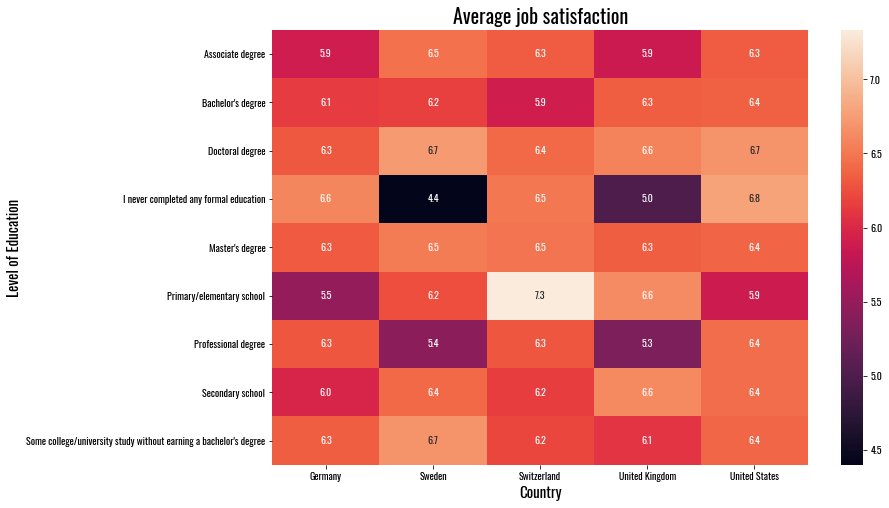

In [80]:
plt.figure(figsize=(12,8))
sns.heatmap(piv3, annot=True, fmt="0.1f")

plt.title("Average job satisfaction", fontsize=20)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Level of Education", fontsize=15)

plt.show()

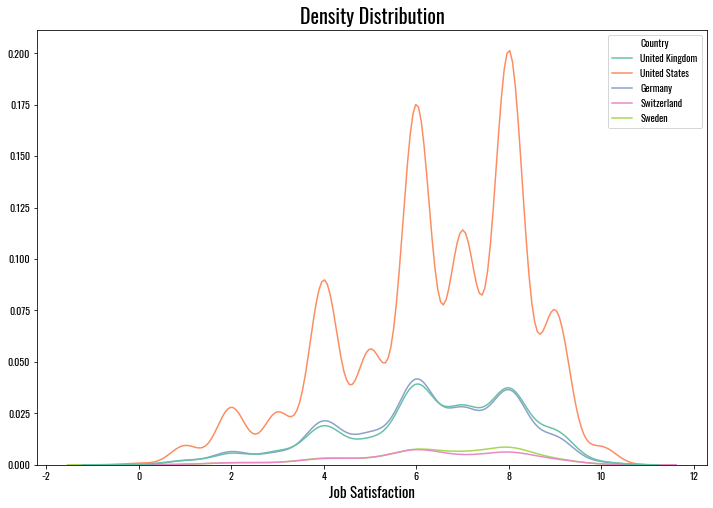

In [96]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=countries, x="JobSat", hue="Country")

plt.title("Density Distribution", fontsize=20)
plt.xlabel("Job Satisfaction", fontsize=15)
plt.ylabel("")

plt.show()

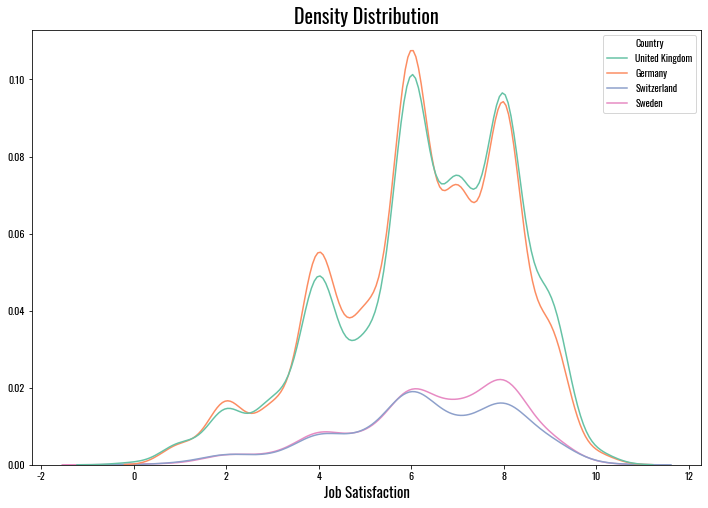

In [95]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=europe, x="JobSat", hue="Country")

plt.title("Density Distribution", fontsize=20)
plt.xlabel("Job Satisfaction", fontsize=15)
plt.ylabel("")

plt.show()

In [83]:
countries.pivot_table(index="EdLevel" ,columns="Country",values="JobSat",aggfunc="mean")

Country,Germany,Sweden,Switzerland,United Kingdom,United States
EdLevel,,,,,
Associate degree,5.895522,6.454545,6.333333,5.860465,6.334152
Bachelor's degree,6.130662,6.159292,5.903846,6.337173,6.352692
Doctoral degree,6.308108,6.730769,6.409836,6.574766,6.689165
I never completed any formal education,6.600000,4.400000,6.500000,5.000000,6.787879
I prefer not to answer,7.333333,NaN,NaN,NaN,NaN
Master's degree,6.323529,6.530387,6.485207,6.345361,6.375582
Primary/elementary school,5.500000,6.250000,7.333333,6.625000,5.868421
Professional degree,6.296296,5.428571,6.300000,5.333333,6.433333
Secondary school,5.973684,6.410714,6.150000,6.617188,6.431734


### GENERAL ANAYLSIS OF ENITRE DATASET

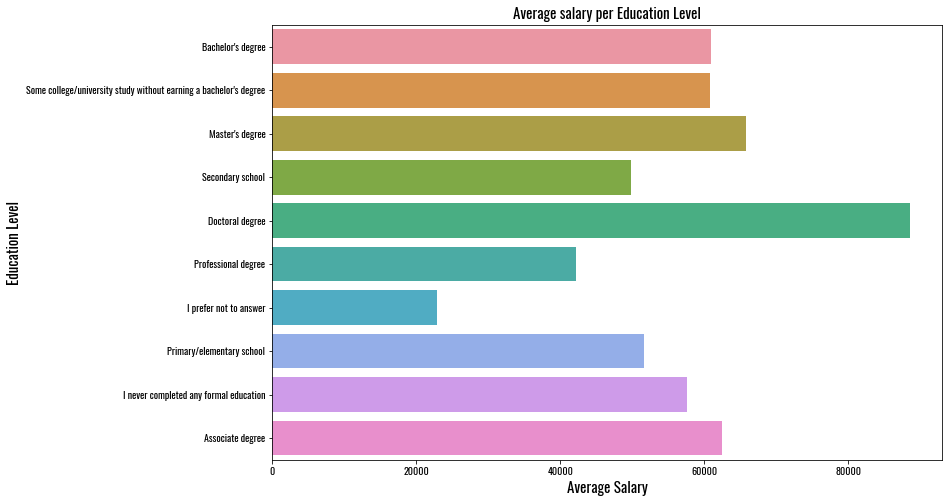

In [84]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x="ConvertedComp", y="EdLevel", ci=None)

plt.title("Average salary per Education Level", fontsize=15)
plt.xlabel("Average Salary", fontsize=15)
plt.ylabel("Education Level", fontsize=15)

plt.show()

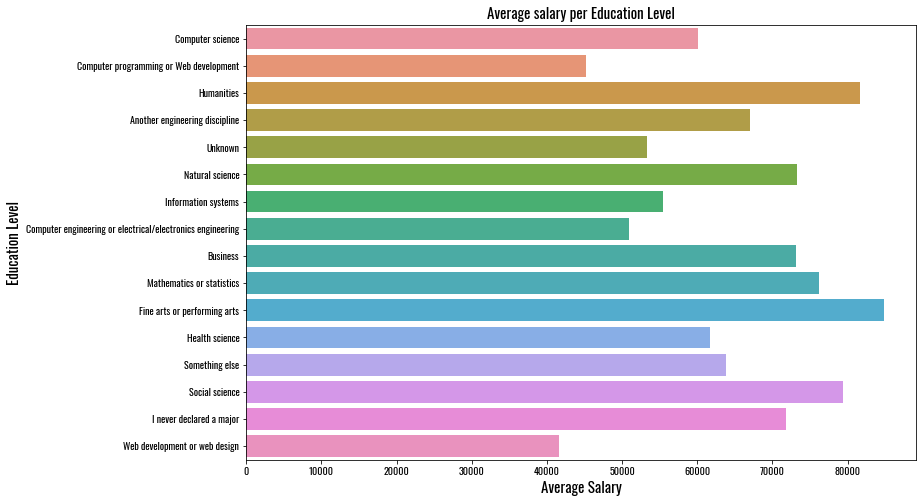

In [85]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x="ConvertedComp", y="UndergradMajor", ci=None)

plt.title("Average salary per Education Level", fontsize=15)
plt.xlabel("Average Salary", fontsize=15)
plt.ylabel("Education Level", fontsize=15)

plt.show()

<AxesSubplot:xlabel='EdLevel', ylabel='UndergradMajor'>

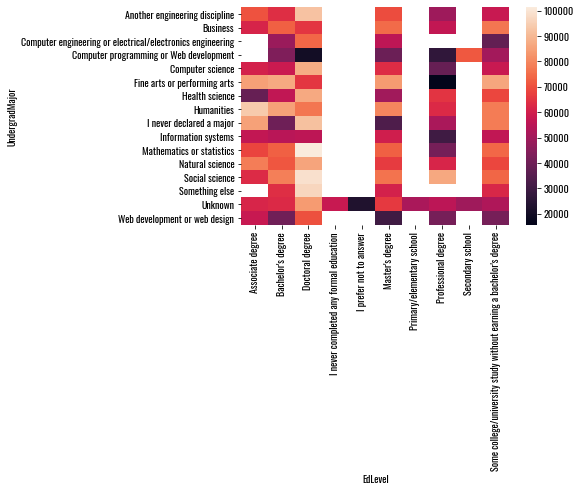

In [86]:
sns.heatmap(df.groupby(["UndergradMajor","EdLevel"]).ConvertedComp.mean().unstack())

In [87]:
df.groupby(["UndergradMajor","EdLevel"]).JobSat.mean().unstack()

EdLevel,Associate degree,Bachelor's degree,Doctoral degree,I never completed any formal education,I prefer not to answer,Master's degree,Primary/elementary school,Professional degree,Secondary school,Some college/university study without earning a bachelor's degree
UndergradMajor,,,,,,,,,,
Another engineering discipline,6.326531,6.084906,6.410000,NaN,NaN,6.018653,NaN,6.023256,NaN,5.934853
Business,5.954545,5.880658,6.720000,NaN,NaN,6.266026,NaN,5.846154,NaN,6.205479
Computer engineering or electrical/electronics engineering,NaN,6.597826,7.857143,NaN,NaN,7.187500,NaN,NaN,NaN,7.280000
Computer programming or Web development,NaN,6.235294,10.000000,NaN,NaN,5.476190,NaN,7.875000,8.500000,7.068493
Computer science,5.960000,6.071088,6.503745,NaN,NaN,6.118333,NaN,5.669421,NaN,6.120781
Fine arts or performing arts,5.956522,6.163265,6.000000,NaN,NaN,6.627119,NaN,4.500000,NaN,5.891089
Health science,5.000000,6.366667,6.772727,NaN,NaN,5.459459,NaN,6.533333,NaN,6.526316
Humanities,5.857143,6.359712,5.972973,NaN,NaN,6.315000,NaN,5.500000,NaN,6.175824
I never declared a major,6.447368,6.200000,9.000000,NaN,NaN,6.083333,NaN,5.714286,NaN,6.378788


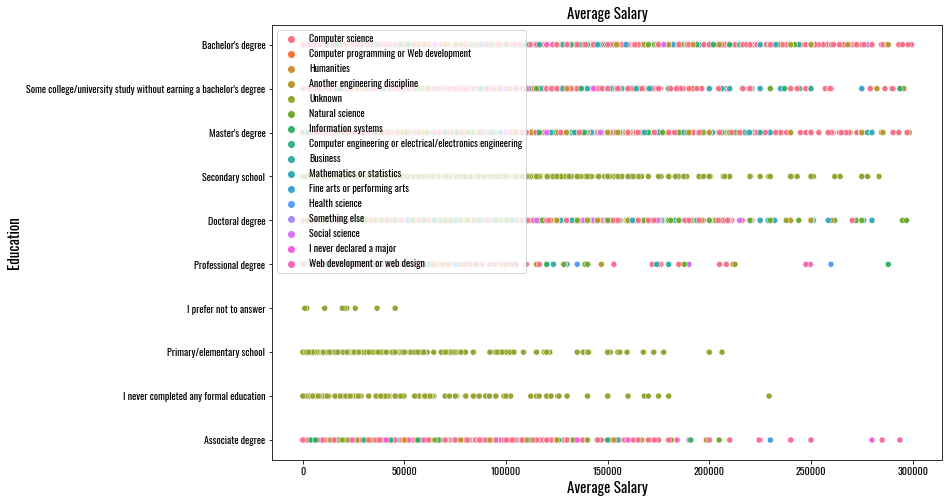

In [88]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="ConvertedComp", y="EdLevel", hue="UndergradMajor")

plt.title("Average Salary", fontsize=15)
plt.xlabel("Average Salary", fontsize=15)
plt.ylabel("Education", fontsize=15)
plt.legend(loc='upper left')
#plt.xticks(rotation=45)

plt.show()

## COMPARING BACHELOR, MASTER AND DOCTORAL DEGREE

In [89]:
df_b_m = df.loc[(df.EdLevel == "Bachelor's degree") | (df.EdLevel == "Master's degree")]

In [90]:
df_m = df.loc[df.EdLevel == "Master's degree"]
df_m

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data",comp_size
4,2017,Both,27000.0000,Ukraine,Master's degree,Employed full-time,7.0,100 to 499 employees,Computer science,5.0,0,1,NaN,NaN,Medium
11,2017,Both,103000.0000,United States,Master's degree,Employed full-time,8.0,500 to 999 employees,Computer science,16.0,0,1,NaN,NaN,Medium
12,2017,No,81000.0000,United States,Master's degree,Employed full-time,10.0,"1,000 to 4,999 employees",Another engineering discipline,7.0,1,0,NaN,NaN,Large
15,2017,Both,150000.0000,United Kingdom,Master's degree,Employed full-time,8.0,"1,000 to 4,999 employees",Computer science,18.0,1,0,NaN,NaN,Large
17,2017,Both,62365.5914,Austria,Master's degree,Employed full-time,3.0,100 to 499 employees,Computer science,11.0,1,0,NaN,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33588,2020,Yes,42158.0000,France,Master's degree,Employed full-time,5.0,"5,000 to 9,999 employees",Computer science,26.0,1,1,0.0,1.0,Large
33589,2020,Yes,22620.0000,Mexico,Master's degree,Employed full-time,5.0,500 to 999 employees,Computer science,10.0,1,0,0.0,1.0,Medium
33592,2020,Yes,200000.0000,United States,Master's degree,Employed full-time,8.0,20 to 99 employees,Another engineering discipline,30.0,1,0,1.0,0.0,Small
33598,2020,No,38484.0000,Hungary,Master's degree,"Independent contractor, freelancer, or self-em...",8.0,"Just me - I am a freelancer, sole proprietor, ...",Humanities,12.0,0,0,1.0,0.0,One man


In [91]:
df_b = df.loc[df.EdLevel == "Bachelor's degree"]
df_b

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data",comp_size
0,2017,Both,43750.000000,United Kingdom,Bachelor's degree,Employed full-time,4.0,2 to 9 employees,Computer science,2.0,1,1,NaN,NaN,Micro
5,2017,Yes,120000.000000,United States,Bachelor's degree,Employed full-time,10.0,20 to 99 employees,Computer science,5.0,0,1,NaN,NaN,Small
6,2017,No,62121.212120,Canada,Bachelor's degree,Employed full-time,4.0,20 to 99 employees,Computer science,10.0,0,1,NaN,NaN,Small
8,2017,Yes,1481.481481,Poland,Bachelor's degree,Employed full-time,10.0,2 to 9 employees,Humanities,1.0,0,1,NaN,NaN,Micro
13,2017,Yes,120000.000000,United States,Bachelor's degree,Employed full-time,10.0,20 to 99 employees,Computer science,20.0,1,0,NaN,NaN,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33586,2020,Yes,14220.000000,Mexico,Bachelor's degree,Employed full-time,6.0,"10,000 or more employees",Computer science,4.0,0,1,0.0,0.0,Very Large
33587,2020,Yes,80000.000000,United States,Bachelor's degree,Employed part-time,8.0,"10,000 or more employees",Computer science,1.0,0,1,0.0,0.0,Very Large
33591,2020,Yes,100000.000000,United States,Bachelor's degree,Employed full-time,6.0,"10,000 or more employees",Unknown,5.0,1,1,1.0,1.0,Very Large
33594,2020,Yes,27025.000000,Spain,Bachelor's degree,Employed full-time,4.0,10 to 19 employees,Computer science,2.0,0,0,0.0,1.0,Small


In [92]:
df_b_m.loc[df_b_m.EdLevel == "Bachelor's degree"]

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data",comp_size
0,2017,Both,43750.000000,United Kingdom,Bachelor's degree,Employed full-time,4.0,2 to 9 employees,Computer science,2.0,1,1,NaN,NaN,Micro
5,2017,Yes,120000.000000,United States,Bachelor's degree,Employed full-time,10.0,20 to 99 employees,Computer science,5.0,0,1,NaN,NaN,Small
6,2017,No,62121.212120,Canada,Bachelor's degree,Employed full-time,4.0,20 to 99 employees,Computer science,10.0,0,1,NaN,NaN,Small
8,2017,Yes,1481.481481,Poland,Bachelor's degree,Employed full-time,10.0,2 to 9 employees,Humanities,1.0,0,1,NaN,NaN,Micro
13,2017,Yes,120000.000000,United States,Bachelor's degree,Employed full-time,10.0,20 to 99 employees,Computer science,20.0,1,0,NaN,NaN,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33586,2020,Yes,14220.000000,Mexico,Bachelor's degree,Employed full-time,6.0,"10,000 or more employees",Computer science,4.0,0,1,0.0,0.0,Very Large
33587,2020,Yes,80000.000000,United States,Bachelor's degree,Employed part-time,8.0,"10,000 or more employees",Computer science,1.0,0,1,0.0,0.0,Very Large
33591,2020,Yes,100000.000000,United States,Bachelor's degree,Employed full-time,6.0,"10,000 or more employees",Unknown,5.0,1,1,1.0,1.0,Very Large
33594,2020,Yes,27025.000000,Spain,Bachelor's degree,Employed full-time,4.0,10 to 19 employees,Computer science,2.0,0,0,0.0,1.0,Small


In [93]:
df_d = df.loc[df.EdLevel == "Doctoral degree"]

In [94]:
countries_b = countries.loc[countries.EdLevel == "Bachelor's degree"]
countries_b

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data",comp_size
0,2017,Both,43750.0,United Kingdom,Bachelor's degree,Employed full-time,4.0,2 to 9 employees,Computer science,2.0,1,1,NaN,NaN,Micro
5,2017,Yes,120000.0,United States,Bachelor's degree,Employed full-time,10.0,20 to 99 employees,Computer science,5.0,0,1,NaN,NaN,Small
13,2017,Yes,120000.0,United States,Bachelor's degree,Employed full-time,10.0,20 to 99 employees,Computer science,20.0,1,0,NaN,NaN,Small
19,2017,Both,52500.0,United States,Bachelor's degree,Employed full-time,5.0,500 to 999 employees,Computer science,4.0,1,0,NaN,NaN,Medium
25,2017,No,65000.0,United States,Bachelor's degree,Employed full-time,7.0,"1,000 to 4,999 employees",Computer science,6.0,0,1,NaN,NaN,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33556,2020,No,77832.0,Germany,Bachelor's degree,Employed full-time,2.0,10 to 19 employees,Business,12.0,0,1,1.0,0.0,Small
33571,2020,Yes,78000.0,United States,Bachelor's degree,Employed full-time,8.0,"10,000 or more employees",Humanities,23.0,0,1,0.0,0.0,Very Large
33577,2020,Yes,100000.0,United States,Bachelor's degree,Employed full-time,6.0,20 to 99 employees,Social science,3.0,1,0,1.0,0.0,Small
33587,2020,Yes,80000.0,United States,Bachelor's degree,Employed part-time,8.0,"10,000 or more employees",Computer science,1.0,0,1,0.0,0.0,Very Large


In [106]:
swe.describe()

,Year,ConvertedComp,JobSat,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,490.000000,333.000000
mean,2018.792060,58915.285919,6.440454,9.699433,0.311909,0.587902,0.210204,0.294294
std,0.886693,23772.640592,1.799818,7.467760,0.463712,0.492679,0.407870,0.456411
min,2017.000000,180.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,46153.846150,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,55233.000000,7.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,2019.000000,67500.000000,8.000000,13.000000,1.000000,1.000000,0.000000,1.000000
max,2020.000000,220950.000000,10.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
countries_m = countries.loc[countries.EdLevel == "Master's degree"]

In [101]:
countries_d = countries.loc[countries.EdLevel == "Doctoral degree"]

In [102]:
swe = df.loc[df.Country == "Sweden"]

In [103]:
swe_m = swe.loc[swe.EdLevel =="Master's degree"]

In [104]:
swe_b = swe.loc[swe.EdLevel =="Bachelor's degree"]

In [105]:
swe_d = swe.loc[swe.EdLevel =="Doctoral degree"]

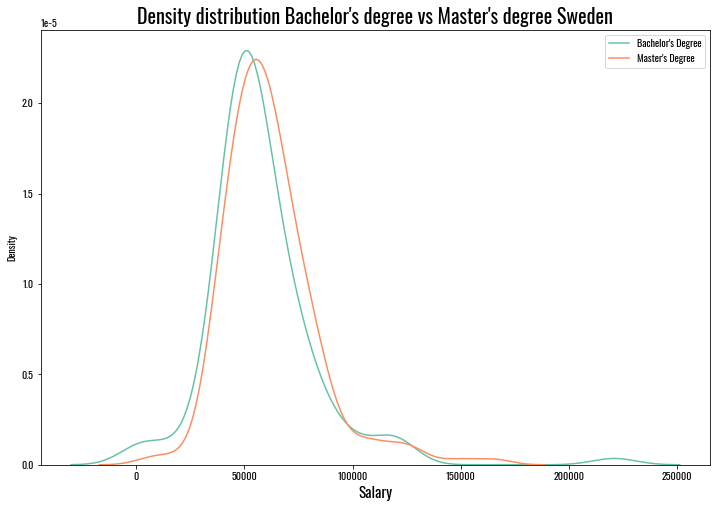

In [107]:
# Density plot bachelor vs master for Sweden
plt.figure(figsize=(12,8))


sns.kdeplot(data=swe_b, x="ConvertedComp",label="Bachelor's Degree")
sns.kdeplot(data=swe_m, x="ConvertedComp",label="Master's Degree")
plt.title("Density distribution Bachelor's degree vs Master's degree Sweden", fontsize=20)
plt.xlabel("Salary", fontsize=15)
plt.legend()

plt.show()

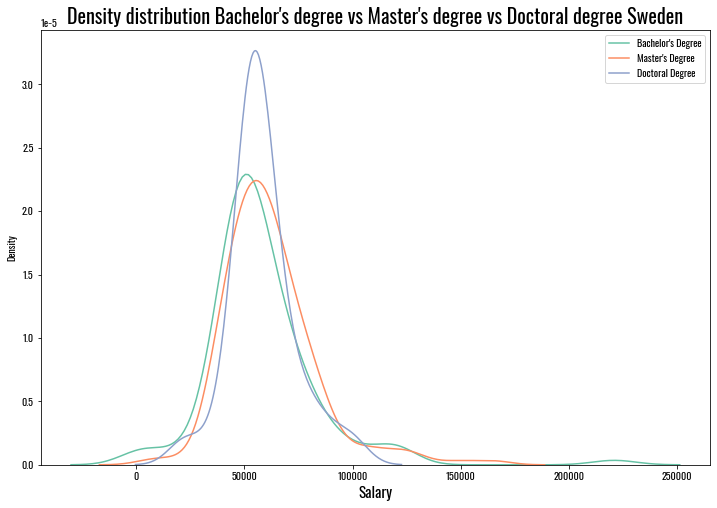

In [108]:
# Density plot bachelor vs master vs Doctoral degree for Sweden
plt.figure(figsize=(12,8))


sns.kdeplot(data=swe_b, x="ConvertedComp",label="Bachelor's Degree")
sns.kdeplot(data=swe_m, x="ConvertedComp",label="Master's Degree")
sns.kdeplot(data=swe_d, x="ConvertedComp",label="Doctoral Degree")

plt.title("Density distribution Bachelor's degree vs Master's degree vs Doctoral degree Sweden", fontsize=20)
plt.xlabel("Salary", fontsize=15)
plt.legend()

plt.show()

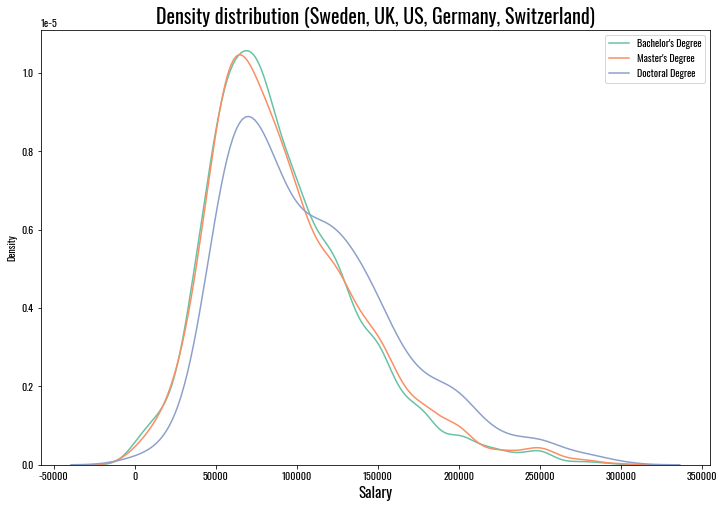

In [109]:
# Density plot bachelor vs master for US, Sweden, UK, Switzerland and Germany
plt.figure(figsize=(12,8))


sns.kdeplot(data=countries_b, x="ConvertedComp",label="Bachelor's Degree")
sns.kdeplot(data=countries_m, x="ConvertedComp",label="Master's Degree")
sns.kdeplot(data=countries_d, x="ConvertedComp",label="Doctoral Degree")

plt.title("Density distribution (Sweden, UK, US, Germany, Switzerland)", 
          fontsize=20)
plt.xlabel("Salary", fontsize=15)
plt.legend()

plt.show()

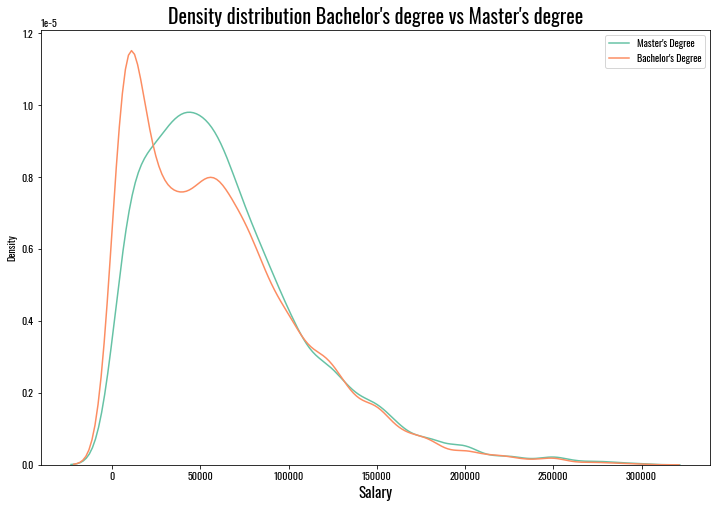

In [110]:
plt.figure(figsize=(12,8))


sns.kdeplot(data=df_m, x="ConvertedComp",label="Master's Degree")
sns.kdeplot(data=df_b, x="ConvertedComp",label="Bachelor's Degree")
plt.title("Density distribution Bachelor's degree vs Master's degree", fontsize=20)
plt.xlabel("Salary", fontsize=15)
plt.legend()

plt.show()

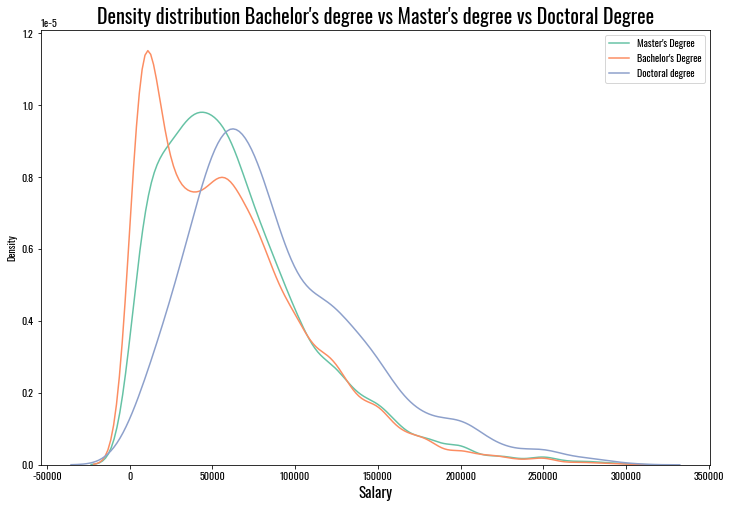

In [111]:
plt.figure(figsize=(12,8))


sns.kdeplot(data=df_m, x="ConvertedComp",label="Master's Degree")
sns.kdeplot(data=df_b, x="ConvertedComp",label="Bachelor's Degree")
sns.kdeplot(data=df_d, x="ConvertedComp", label="Doctoral degree")
plt.title("Density distribution Bachelor's degree vs Master's degree vs Doctoral Degree", fontsize=20)
plt.xlabel("Salary", fontsize=15)
plt.legend()

plt.show()

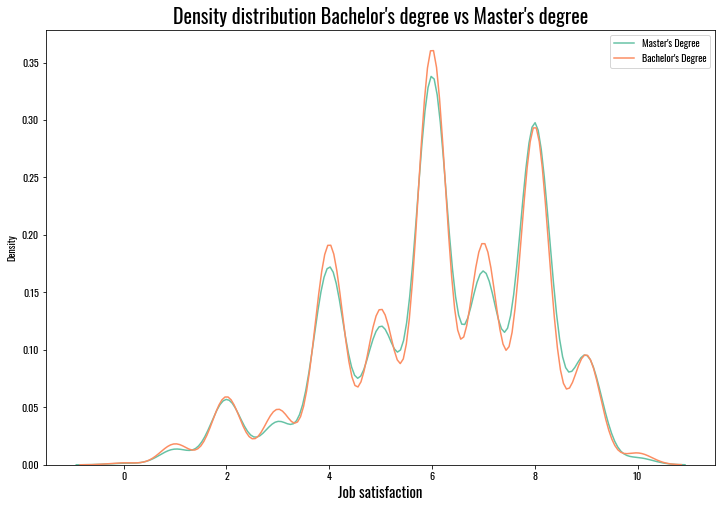

In [112]:
plt.figure(figsize=(12,8))


sns.kdeplot(data=df_m, x="JobSat",label="Master's Degree")
sns.kdeplot(data=df_b, x="JobSat",label="Bachelor's Degree")
plt.title("Density distribution Bachelor's degree vs Master's degree", fontsize=20)
plt.xlabel("Job satisfaction", fontsize=15)
plt.legend()

plt.show()

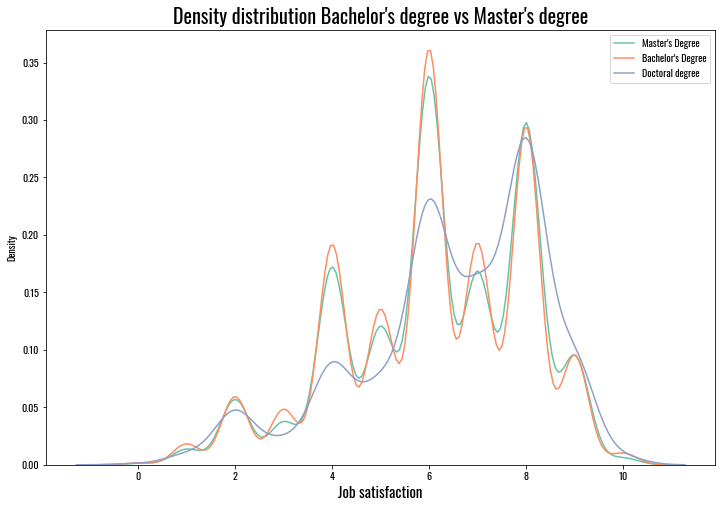

In [113]:
plt.figure(figsize=(12,8))


sns.kdeplot(data=df_m, x="JobSat",label="Master's Degree")
sns.kdeplot(data=df_b, x="JobSat",label="Bachelor's Degree")
sns.kdeplot(data=df_d, x="JobSat", label="Doctoral degree")
plt.title("Density distribution Bachelor's degree vs Master's degree", fontsize=20)
plt.xlabel("Job satisfaction", fontsize=15)
plt.legend()

plt.show()

In [ ]:
df_b.corr()

In [ ]:
df_m.corr()

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="YearsCodePro", y="ConvertedComp", hue="JobSat")

plt.title("Average Salary", fontsize=15)
plt.xlabel("YearsCodePro", fontsize=15)
plt.ylabel("Average Salary", fontsize=15)

plt.show()

In [ ]:
df.ConvertedComp

In [ ]:
# WHAT TO DO WITH LOW VALUES? 

In [ ]:
df.Country.value_counts().head(50)

In [ ]:
# REMOVE COUNTRIES WITH ONLY 1 RESPONDENT?

In [ ]:
df.Country.value_counts().tail(70).index

In [ ]:
more_100_responses = ['United States', 'Germany', 'United Kingdom', 'India', 'Canada',
       'France', 'Brazil', 'Australia', 'Netherlands', 'Spain',
       'Russian Federation', 'Italy', 'Poland', 'Sweden', 'Switzerland',
       'Mexico', 'Austria', 'South Africa', 'Turkey', 'Denmark', 'Belgium',
       'Czech Republic', 'Pakistan', 'Israel', 'Norway', 'Ukraine', 'Greece',
       'Argentina', 'Romania', 'Iran', 'New Zealand', 'Finland', 'Portugal',
       'Ireland', 'Indonesia', 'Hungary', 'Bulgaria', 'Japan', 'Bangladesh',
       'Nigeria', 'Slovenia', 'Colombia', 'Philippines', 'Chile', 'China',
       'Serbia']

In [ ]:
df = df.loc[df.Country.isin(more_100_responses)]

In [ ]:
df.isna().sum(axis=0)

In [ ]:
df.corr()

In [ ]:
df.describe()

In [ ]:
countries